In [5]:
import pandas as pd
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

from nera.data_management.data_acquisition import DataAcquisition
from nera.data_management.data_transformation import DataTransformation
from nera.data_management import FROM_CSV
from nera.models.gnn import GCONVCheb
from nera.trainer import Trainer



### Data preparation

In [6]:
da = DataAcquisition()
df = da.get_data(FROM_CSV, fname="../resources/other_leagues.csv")
df['DT'] = pd.to_datetime(df['DT'], format="%Y-%m-%d %H:%M:%S")
data_transform = DataTransformation(df, timedelta(365))
df = df[(df['League'] != 'EuroLeague') & (df['League'] != 'EuroCup')] 
df = df.reset_index()

transform = DataTransformation(df, timedelta(365))
dataset = transform.get_dataset(node_f_extract=False, edge_f_one_hot=True)

team_count = transform.num_teams

# We will use the default implemented setting: 
#
# GCONVLSTM(self, team_count: int,
#                 embed_dim: int = 10,
#                 dense_dims: tuple[int] = (8, 8, 8, 8, 8),
#                 conv_out_dim: int = 16,
#                 dropout_rate: float = 0.1,
#                 activation: str = 'relu',
#                 K: int = 5):
model = GCONVCheb(team_count)
model

2024-02-26 15:50:21.957 | INFO     | nera.data_management._data_saving_loading:load_data_csv:70 - 21100 rows loaded from ../resources/other_leagues.csv


GCONVCheb(
  (act_fn): ReLU()
  (embedding): Embedding(146, 20)
  (dense_sequence): Sequential(
    (lin0): Linear(in_features=32, out_features=8, bias=True)
    (act0): ReLU()
    (dropout0): Dropout(p=0.1, inplace=False)
    (lin1): Linear(in_features=8, out_features=8, bias=True)
    (act1): ReLU()
    (dropout1): Dropout(p=0.1, inplace=False)
    (lin2): Linear(in_features=8, out_features=8, bias=True)
    (act2): ReLU()
    (dropout2): Dropout(p=0.1, inplace=False)
    (lin3): Linear(in_features=8, out_features=8, bias=True)
    (act3): ReLU()
    (dropout3): Dropout(p=0.1, inplace=False)
    (lin4): Linear(in_features=8, out_features=8, bias=True)
    (act4): ReLU()
    (dropout4): Dropout(p=0.1, inplace=False)
    (lin5): Linear(in_features=8, out_features=3, bias=True)
    (act5): ReLU()
    (dropout5): Dropout(p=0.1, inplace=False)
  )
  (out_layer): Softmax(dim=1)
)

### MODEL 
--------------------------------
training:

2024-02-26 15:50:28.013 | INFO     | nera.trainer:train:56 - [TRN] Epoch: 0, training loss: 2.193, training accuracy: 43.85% 
2024-02-26 15:50:28.084 | INFO     | nera.trainer:train:56 - [TRN] Epoch: 1, training loss: 2.194, training accuracy: 43.85% 
2024-02-26 15:50:28.160 | INFO     | nera.trainer:train:56 - [TRN] Epoch: 2, training loss: 2.194, training accuracy: 43.85% 
2024-02-26 15:50:28.237 | INFO     | nera.trainer:train:56 - [TRN] Epoch: 3, training loss: 2.193, training accuracy: 43.85% 
2024-02-26 15:50:28.303 | INFO     | nera.trainer:train:56 - [TRN] Epoch: 4, training loss: 2.191, training accuracy: 43.85% 
2024-02-26 15:50:28.370 | INFO     | nera.trainer:train:56 - [TRN] Epoch: 5, training loss: 2.192, training accuracy: 43.85% 
2024-02-26 15:50:28.440 | INFO     | nera.trainer:train:56 - [TRN] Epoch: 6, training loss: 2.190, training accuracy: 43.85% 
2024-02-26 15:50:28.509 | INFO     | nera.trainer:train:56 - [TRN] Epoch: 7, training loss: 2.189, training accuracy: 

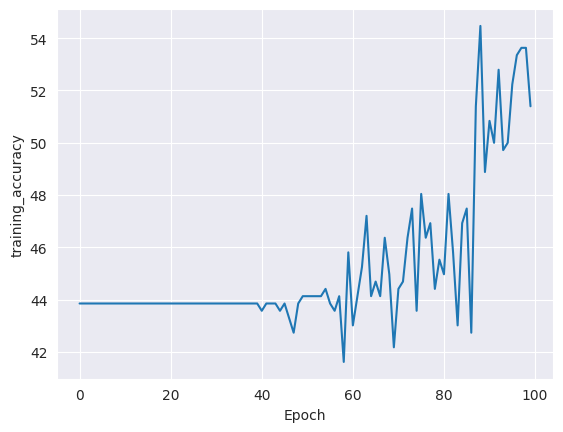

In [7]:
trainer = Trainer(dataset, model)
training_accuracy = trainer.train(epochs=100, verbose=True)


ax = sns.lineplot(x="index", y="training_accuracy", data=pd.DataFrame(training_accuracy, columns=["training_accuracy"]).reset_index())
ax.set(xlabel="Epoch")
plt.show()

Testing:

In [8]:
trainer.test(verbose=True)

2024-02-26 15:50:39.794 | INFO     | nera.trainer:test:75 - [TST] Testing accuracy: 58.57%


0.5857058320731146